OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in commercial products.

In this notebook, we will introduce some basic concepts and functionalities of OpenCV, including how to read, write and display images, basic operations on images, image processing techniques, and feature detection. Let's get started!


# ***The parts you need to complete are marked.***

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Grayscale Image

In [2]:
I_gray = cv2.imread('ComputerDepartment_gray.jpg', cv2.IMREAD_UNCHANGED)

The image stored in the variable **I_gray** as a numpy array.

In [3]:
print(f'Type of I_gray : {type(I_gray)}')

Type of I_gray : <class 'numpy.ndarray'>


You can see the shape of I(size of image) and the data type with the following codes.

In [4]:
print(f'Shape of I_gray : {I_gray.shape}')

Shape of I_gray : (600, 800)


In [5]:
print(f'Data type of I_gray : {I_gray.dtype}')

Data type of I_gray : uint8


In [6]:
print(f'Number of dimensions of I_gray : {I_gray.ndim}')

Number of dimensions of I_gray : 2


In [7]:
print(f'Size of I_gray(Byte) : {I_gray.size}')

Size of I_gray(Byte) : 480000


Now we have information about I. The next step is to show it.

In [8]:
cv2.imshow('ComputerDepartment Gray', I_gray)
cv2.waitKey(5000)
cv2.destroyAllWindows()

If you use google colab, you should first import cv2_imshow from google.colab.patches and then use it instead of using cv2.imshow.

## Color Image

In [9]:
I = cv2.imread('ComputerDepartment.jpg', cv2.IMREAD_UNCHANGED)

Now we get all the information we obtained about the grayscale image for the color image and compare it.

The image stored in the variable **I** as a numpy array.

In [10]:
print(f'Type of I : {type(I)}')
print(f'Shape of I : {I.shape}')
print(f'Data type of I : {I.dtype}')
print(f'Number of dimensions of I : {I.ndim}')
print(f'Size of I(Byte) : {I.size}')

Type of I : <class 'numpy.ndarray'>
Shape of I : (600, 800, 3)
Data type of I : uint8
Number of dimensions of I : 3
Size of I(Byte) : 1440000


Now we can show it.

In [11]:
cv2.imshow('ComputerDepartment', I)
cv2.waitKey(5000)
cv2.destroyAllWindows()

Instead of displaying the image with OpenCV, we can also display it with Matplotlib.

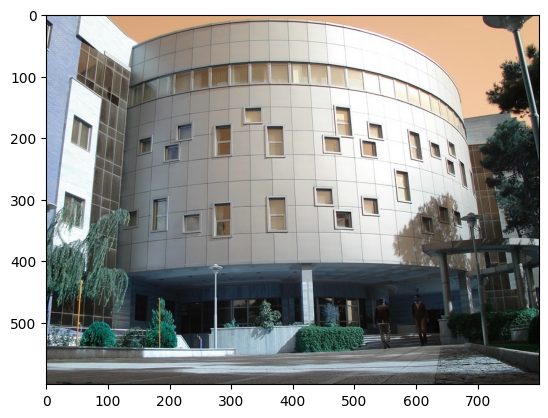

In [12]:
plt.imshow(I)
plt.show()

As you can see, there are differences between the results of these two methods. Investigate what is the reason for this difference? Write your answer in persian in the report file.

Now try to make Matplotlib output like OpenCV and show it.

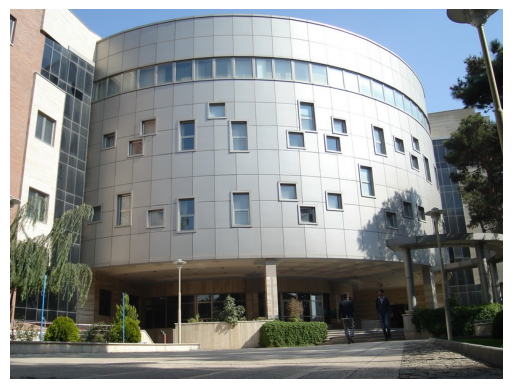

In [30]:
# First way: convert the loaded image to RGB format using "cvtColor" function.
rgb_image = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
pixels = np.array(rgb_image)
plt.imshow(pixels)

# Second way: using Split() function of OpenCV library which separates the color channels. 
# and change the order of channels and merge them with cv2.merge.
# b, g, r = cv2.split(I)
# plt.imshow(cv2.merge([r, g, b]))

# Showing Options
plt.axis('off')
plt.show()

Please obtain and display the following modes for color image concatenation.

Mode 1 : The main image should be joined vertically with its vertical invert.

In [31]:
vertical_invert = cv2.flip(I, 0) # invert the image vertically using cv2.flip - 0 means vertical
inverted_image = np.vstack((I, vertical_invert)) #  stack the original and inverted images vertically
resized_image = cv2.resize(inverted_image, (500, 700)) #  resize the image in a way that it fits the desktop window
# showing options
cv2.imshow('Result', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Mode 2 : The vertical invert of the original image should be joined vertically with the original image.

In [32]:
vertical_invert = cv2.flip(I, 0) #  invert the image in vertical direction
inverted_image = np.vstack((vertical_invert, I)) # stack the inverted and original images vertically
resized_image = cv2.resize(inverted_image, (500, 700)) # resize the image to have a width of 500 and height of 700
# showing options
cv2.imshow('Result', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Mode 3 : The main image should be joined horizontally with its horizontal invert.

In [33]:
horizontal_invert = cv2.flip(I, 1) #  Flipping the image horizontally
inverted_image = np.hstack((I, horizontal_invert)) #  Stacking the original and inverted images horizontally
# showing options
cv2.imshow('Result', inverted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Mode 4 : The horizontal invert of the original image should be joined horizontally with the original image.

In [36]:
horizontal_invert = cv2.flip(I, 1) #  Flipping the image horizontally
inverted_image = np.hstack((horizontal_invert, I)) # Stacking the inverted and original images horizontally
# showing options
cv2.imshow('Result', inverted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Change the color of one of the windows of the computer faculty building as desired. Try to do this very carefully.

In [37]:
x, y, w, h = 360, 297, 29, 53  # Example: Rectangle coordinates (x, y, width, height)
modified_image = I.copy() #  Make a copy of the original image to modify it
color = (200, 0, 255) # Color
cv2.rectangle(modified_image, (x, y), (x + w, y + h), color, -1) # Draw rectangle on modified image with the given size
# showing options
cv2.imshow('Colorized Image', modified_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now save the resulted image with name 'Colored_Window.jpg'.

In [38]:
cv2.imwrite('Colored_Window.jpg', modified_image) # Saving the modified image as 'Colored_Window.jpg'

True

First, read and display the image of the iust logo. Then show each of its color channels so that the ​blue channel​ is displayed in the blue, ​green channel​ in the green, and ​red channel​ in red. Notice that since these are color images they have to be ​m​x​n​x​3 ​arrays. For a purely red image, the green and blue channels are entirely zero.

Read logo and show it.

In [20]:
image = cv2.imread('logo.jpg') # Reading image
# showing options
cv2.imshow('Original Image', image) 
cv2.waitKey(0)
cv2.destroyAllWindows()

Show blue channel.

In [21]:
b, g, r = cv2.split(image) # Split the image into Blue, Green and Red channels
zeros = np.zeros_like(b) #  Create a zeros array with the same size as b
# showing options
cv2.imshow('Blue Channel', cv2.merge([b, zeros, zeros])) # Show only the blue channel using 'merge' and setting Green and Red channels as 0s
cv2.waitKey(0)
cv2.destroyAllWindows()

Show green channel.

In [22]:
##########################Start Code###################################
cv2.imshow('Green Channel', cv2.merge([zeros, g, zeros])) # Show only the green channel using 'merge' and setting Blue and Red channels as 0s
cv2.waitKey(0)
cv2.destroyAllWindows()
###########################End Code####################################

Show red channel.

In [23]:
##########################Start Code###################################
cv2.imshow('Red Channel', cv2.merge([zeros, zeros, r])) # Show only the Red channel using 'merge' and setting Green and Blue channels as 0s
cv2.waitKey(0)
cv2.destroyAllWindows()
###########################End Code####################################